# Fall of an object in a viscous fluid - one dimensional problem

## Equations of motion

The equation of motion of an object falling in a viscous fluid with laminar flow is:
$$
\frac{dv}{dt} = -\beta v +g,\ v(0)=v_0
$$
where $g$ is the acceleration of gravity,$\beta=\alpha/m$ where $\alpha$ is the drag and $m$ is the mass of the object, and where $v_0$ is the initial velocity of the object.  For a spherical object, 
$$
\beta = \frac{6\pi \eta r}{m}\ ,   
$$
where $\eta$ is the dynamical viscosity of the fluid and $r$ is the radius of the object. 
Following the method above, it is easy to solve numerically such an equation. We will take the parameters: $v_0=0 \text{m/s},\ r = 0.005 \text{m},\ m=0.001\text{kg},\ g=9.81 \text{ms}^{-1},\ \eta = 8.90 \times 10^4 \text{Pa·s}$ (small metalic object falling in water). We look at the evolution of the velocity in the time interval $t\in[0,50]$, where $t$ is measured in second.  

## Euler algorithm and numerical solution

As we discussed in the previous cell, the equation of motion is:
$$
\frac{dv}{dt} = -\beta v +g,\ v(0)=v_0\ .
$$

In order to solve the system of ODEs above, we use the Euler method. Basically, we discretize the time interval $[t_i,t_f]$ into $n$ small intervals $[t_i,t_1]$, $[t_1,t_2]$, $[t_2,t_3]$, ..., $[t_{k},t_{k+1}]$,..., $[t_{n-1},t_f]$, where  
$$
t_{k} = k\frac{t_f-t_i}{n} = k\ h\ ,
$$
where $n$ is large enough so that the duration $h\ll t_f-t_i$. 

One can calculate the acceleration of the object in each interval as: 
$$
\frac{dv}{dt} \approx 
\frac{v(t_{k+1})-v(t_{k})}{t_{k+1}-t_{k}}
$$

We can model the velocity $v$ by a sequence $u(k) = v(t_k) $. From above, we find the recursive formula:
$$
\frac{u(k+1)-u(k)}{h}=-\beta\ u(k) - g
$$

This can be rewritten as;
$$
u(k+1)=u(k) - h\times(\beta\ u(k) + g)
$$

Now we can write a code and find the trajectory of the object using standard python coding methods.

## Code

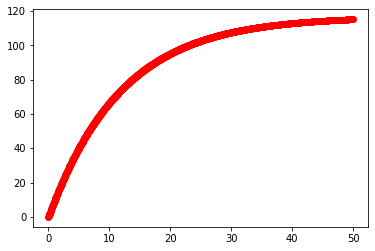

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

v0=0
r=0.005
m=0.001
g=9.81
eta=8.9*10**(-4)

beta=6*np.pi*eta*r/m

v=v0
t=0
tf=50
n=1000
h=(tf)/n
Lv=[]
Lt=[]
for k in range(n):
  Lv.append(v)
  Lt.append(t)
  v=v+h*(-beta*v+g)
  t=t+h
  k=k+1
plt.plot(Lt,Lv,'ro')

To find the position as a function of time, one should remember that the velocity is the first order derivative of the position. Therfore, it suffices to solve the ODE:
$$
\frac{dz}{dt} = v\ ,
$$

Using the discretized model (see above) and the sequence $u(k)$, we find that:
$$
u(k) = \frac{Z(k+1)-Z(k)}{h} \Rightarrow Z(k+1) = Z(k)+h\times u(k)\ .
$$
where the sequence $Z(k) = z(t_{k})$. 

In other words, the displacement is the integral of the velocity (fondamental theorem of calculus):
$$
z(t) - z(0) = \int_{0}^{t}v(\tau)d\tau
$$

To solve numerically this integral for $t=n\delta t = t_n,\ n=0,1,2,\cdots, N$, we should simply sum over the values of the velocity $v(t_k)\delta t,\ k=0,1,2,\cdots, n$, where $t_k = k\delta t$ and $
\delta t=\frac{t_f}{N}$ is the duration of the small steps between $t=0$ and $t=t_f$:
$$
z(t_n) = \sum_{k=0}^{n} v(t_k)\delta t\ .
$$
Let's modify the code above to calculate the sequence $Z(k)$ and graph z versus t:

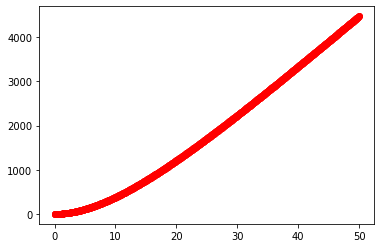

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # We need numpy to use the exponential function

v0=0
r=0.005
m=0.001
g=9.81
eta=8.9*10**(-4)

beta=6*np.pi*eta*r/m

v=v0
z=0 # initial condition for z
t=0
tf=50
n=1000
h=(tf)/n
Lv=[]
Lz=[] # we create a new list to collect the values of z
Lt=[]
for k in range(n):
  Lv.append(v)
  Lz.append(z) # we add z to the list Lz
  Lt.append(t)
  v=v+h*(-beta*v+g)
  z=z+h*v # we increment z
  t=t+h
  k=k+1
plt.plot(Lt,Lz,'ro')

## Problem

**Problem 1:** From the graph v vs. t, it is clear that the object reaches a terminal velocity. After reading the value of the terminal velocity (using the graph), write a code to find the time at which the velocity of the ball is greater than $95\%$ of the terminal velocity.

**Problem2:** If the object experiences drag force in a fluid with turbulent flow, the equation of motion is:
$$
\frac{dv}{dt} = -\gamma |v|v +g\ ,
$$
where $g$ is the acceleration of gravity, where the drag is $\gamma = \frac{C_d \pi \rho r^2}{2m}$, the density of the fluid is $\rho$, the drag coefficient is $C_d =0.5$ (spherical object), and where $r$ is the radius of the object and $m$ its mass. 


1.   Write a code to graph the velocity and the position as a function of time for $\rho = 1.225 \text{kg/m}^3$ (air density), $m=0.45\text{kg}$ and $r=0.23\text{m}$ (soccer ball). 
2.   Write a code to find the terminal velocity of the ball rounded at three digits (tip: *while loop*).   



# Trajectory of an object in a viscous fluid in three dimensions

## Equations of motion and numerical approach

We consider a ball of mass $m$ moving in the air. The mass $m$ experiences gravity (constant and uniform field) and air resistance (drag force). Let $(O;\vec{i},\vec{j},\vec{k})$ be the orthonormal coordinate system.

We first consider the model of laminar force: $\vec{F}_D = -\alpha \vec{v}$, where $\vec{v}$ is the velocity of the mass $m$ and $\alpha>0$ is the drag coefficient. The gravitational force is $\vec{F}_g = m\vec{g}$, where $\vec{g}=-g\ \vec{k}$. The equations of motion are:
\begin{equation}
m\frac{d\vec{v}}{dt} = \vec{F}_D + \vec{F}_g = -\alpha \vec{v} +m \vec{g}\ .
\end{equation}
After projecting each vector into the basis, we find:
\begin{equation}
\begin{cases}
m\frac{dv_x}{dt} = -\alpha v_x \\
m\frac{dv_y}{dt} = -\alpha v_y \\
m\frac{dv_z}{dt} = -\alpha v_z - mg 
\end{cases}
\end{equation}
The position is nothing but the integral of the velocity over time:
\begin{equation}
\begin{cases}
x - x_0 = \int_{t_0}^{t_f}v_x\ dt \\
y - y_0 = \int_{t_0}^{t_f}v_y\ dt \\
z - z_0 = \int_{t_0}^{t_f}v_z\ dt 
\end{cases}
\end{equation}

In order to solve the system of ODEs above, we use the Euler method:
\begin{equation}
\begin{cases}
\frac{dv_x}{dt} \approx \frac{v_x(t_{k+1})-v_x(t_{k})}{t_{k+1}-t_{k}}\\
\frac{dv_y}{dt} \approx \frac{v_y(t_{k+1})-v_y(t_{k})}{t_{k+1}-t_{k}}\\
\frac{dv_z}{dt} \approx \frac{v_z(t_{k+1})-v_z(t_{k})}{t_{k+1}-t_{k}}
\end{cases}
\end{equation}
where 
$$
t_{k} = k\frac{t_f-t_i}{n} = k\ h\ ,
$$
where $n$ is the number of steps between the initial time $t_i$ and the final time $t_f$ and where $h = (t_f-t_i)/n$ is the duration between two steps. In other words, we approximate the velocities $v_x,v_y,v_z$ by sequences $\vec{v} \mapsto \vec{u}(k) = (u_x(k),u_y(k),u_z(k)) $, where $u_{x,y,z}(k) = v_{x,y,z}(t_{k})$. From above, we find the recursive relations satisfied by these three sequences:
\begin{equation}
\begin{cases}
\frac{u_x(k+1)-u_x(k)}{h} = -\beta\ u_x(k) \\
\frac{u_y(k+1)-u_y(k)}{h}=-\beta\ u_x(k)\\
\frac{u_z(k+1)-u_z(k)}{h}=-\beta\ u_x(k) - g
\end{cases}\ ,
\end{equation}
where $\beta = \alpha/m$.
This can be rewritten as;
\begin{equation}
\begin{cases}
u_x(k+1)= u_x(k) - h\times\beta\ u_x(k) \\
u_y(k+1)=u_y(k) - h\times\beta\ u_x(k)\\
u_x(k+1)=u_x(k) - h\times(\beta\ u_x(k) + g)
\end{cases}\ .
\end{equation}

In order to find the positions of the mass $m$, we use a similar method:
\begin{equation}
\begin{cases}
u_x(k) = \frac{x(k+1)-x(k)}{h} \Rightarrow x(k+1) = x(k) + h\times u_x(k)   \\
u_y(k) = \frac{y(k+1)-y(k)}{h} \Rightarrow y(k+1) = y(k) + h\times u_y(k) \\
u_z(k) = \frac{z(k+1)-z(k)}{h} \Rightarrow z(k+1) = z(k) + h\times u_z(k)
\end{cases}\ .
\end{equation}

Now we can write a code and find the trajectory of the mass $m$! 

## Code 1: laminar flow

([<matplotlib.lines.Line2D at 0x7f5fdf888490>],
 [<matplotlib.lines.Line2D at 0x7f5fdf888f50>])

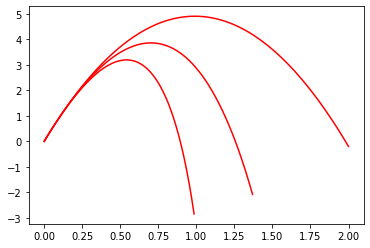

In [ ]:
from matplotlib import pyplot as plt

def trajectory(m,alpha,g,ux0,uy0,uz0,x0,y0,z0,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta = alpha/m
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    ux = ux + h*(-beta*ux)
    uy = uy + h*(-beta*uy)
    uz = uz + h*(-beta*uz - g)
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    k=k+1
  return plt.plot(Lx,Lz,'r-')

trajectory(1,0.8,10,1,0,10,0,0,0,0,2,100), trajectory(1,0.4,10,1,0,10,0,0,0,0,2,100), trajectory(1,0,10,1,0,10,0,0,0,0,2,100)

We can use the code to determine the range of the trajectory (= x-intercept). 
The idea is to use a "while" loop: 

The range is:  0.8969510380530518


([<matplotlib.lines.Line2D at 0x7f5fdd762b50>], None)

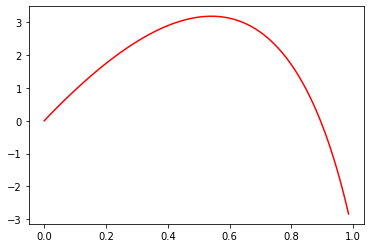

In [ ]:
def trajectory(m,alpha,g,ux0,uy0,uz0,x0,y0,z0,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta = alpha/m
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    ux = ux + h*(-beta*ux)
    uy = uy + h*(-beta*uy)
    uz = uz + h*(-beta*uz - g)
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    k=k+1
  p=1
  while Lz[p]>0:
    p=p+1
  Max = Lx[p]
  return plt.plot(Lx,Lz,'r-'), print("The range is: ", Lx[p])
trajectory(1,0.8,10,1,0,10,0,0,0,0,2,100)

## Code 2: turbulent flow

We can modify the model and solve numerically models that cannot be solved analytically (no closed form expression). For instance, consider the same system as before with turbulent drag force: $\vec{F}_D = -\alpha |\vec{v}|\vec{v}$, where $|\vec{v}|=\sqrt{v_x^2+v_y^2+v_z^2}$ is the norm (magnitude) of the velocity (i.e., the speed). This model is more realistic for large Reynolds number. 

The equations of motion now read:
\begin{equation}
\begin{cases}
m\frac{dv_x}{dt} = -\alpha|\vec{v}| v_x \\
m\frac{dv_y}{dt} = -\alpha|\vec{v}| v_y \\
m\frac{dv_z}{dt} = -\alpha|\vec{v}| v_z - mg 
\end{cases}
\end{equation}

The numerical method is pretty much the same. The only thing that will change is the recursive relations for the velocity:
\begin{equation}
\begin{cases}
u_x(k+1)= u_x(k) - h\times\beta\ |u(k)| u_x(k) \\
u_y(k+1)=u_y(k) - h\times\beta\ |u(k)|u_x(k)\\
u_x(k+1)=u_x(k) - h\times(\beta\ |u(k)|u_x(k) + g)
\end{cases}\ ,
\end{equation}
where $|u(k)| = \sqrt{u_x(k)^2 + u_y(k)^2 + u_z(k)^2}$ .

The range is:  0.30955306614924777
The range is:  0.8969510380530518


(([<matplotlib.lines.Line2D at 0x7f5fdd6cfdd0>], None),
 ([<matplotlib.lines.Line2D at 0x7f5fdd660150>], None))

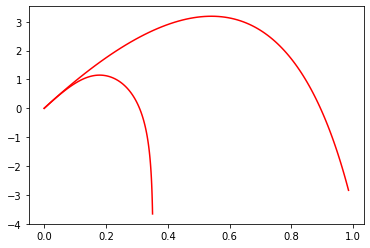

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def trajectory_turbulent(m,alpha,g,ux0,uy0,uz0,x0,y0,z0,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  u=np.sqrt(ux**2+uy**2+uz**2)
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta = alpha/m
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    ux = ux + h*(-beta*u*ux)
    uy = uy + h*(-beta*u*uy)
    uz = uz + h*(-beta*u*uz - g)
    u=np.sqrt(ux**2+uy**2+uz**2)
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    k=k+1
  p=1
  while Lz[p]>0:
    p=p+1
  Max = Lx[p]
  return plt.plot(Lx,Lz,'r-'), print("The range is: ", Lx[p])

trajectory_turbulent(1,0.8,10,1,0,10,0,0,0,0,2,100), trajectory(1,0.8,10,1,0,10,0,0,0,0,2,100)

## Code 3: transition between turbulent and laminar flows

We can also look at the transition between laminar and turbulent flow (depending on the Reynolds number). We basically combine the two models.
The Reynolds number is defined as the ratio between the two drag forces (magnitude):
$$
\mathcal{R}_e = \frac{\alpha_2 v^2}{\alpha_1 v} = \frac{\alpha_2 v}{\alpha_1}\ .
$$
If the mass is a sphere, the drag coefficients are given by:
\begin{equation}
\begin{cases}
\alpha_1 = ... \text{(laminar flow)} \\
\alpha_2 = ....\text{(turbulent flow)}
\end{cases}
\end{equation}

The range is:  0.5217657174926605


([<matplotlib.lines.Line2D at 0x7f5fdd2ea710>],
 None)

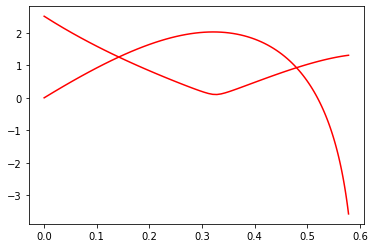

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def trajectory_turbulent_laminar(m,alpha1,alpha2,g,ux0,uy0,uz0,x0,y0,z0,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  u=np.sqrt(ux**2+uy**2+uz**2)
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta1 = alpha1/m
  beta2 = alpha2/m
  R = alpha2*u/alpha1
  LR=[]
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    LR.append(R)
    ux = ux + h*(-beta1*ux - beta2*u*ux)
    uy = uy + h*(-beta1*uy - beta2*u*uy)
    uz = uz + h*(-beta1*uz - beta2*u*uz - g)
    u=np.sqrt(ux**2+uy**2+uz**2)
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    R = alpha2*u/alpha1
    k=k+1
  p=1
  while Lz[p]>0:
    p=p+1
  Max = Lx[p]
  return plt.plot(Lx,Lz,'r-'), plt.plot(Lx,LR,'r-'), print("The range is: ", Lx[p])

trajectory_turbulent_laminar(1,0.8,0.2,10,1,0,10,0,0,0,0,2,100)

# Magnus force 

## Equations of motion

## Code 1: implementing the Magnus force

([<matplotlib.lines.Line2D at 0x7f5fd443ac10>],)

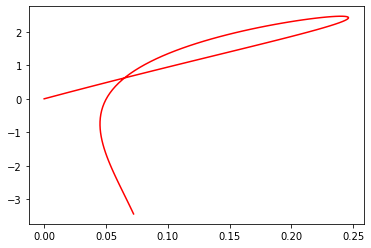

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def trajectory_magnus(m,alpha1,alpha2,gamma,g,ux0,uy0,uz0,x0,y0,z0,omx,omy,omz,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  u=np.sqrt(ux**2+uy**2+uz**2)
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta1 = alpha1/m
  beta2 = alpha2/m
  R = alpha2*u/alpha1
  LR=[]
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    LR.append(R)
    ux = ux + h*(-beta1*ux - beta2*u*ux + gamma*(omy*uz -omz*uy))
    uy = uy + h*(-beta1*uy - beta2*u*uy + gamma*(omz*ux -omx*uz))
    uz = uz + h*(-beta1*uz - beta2*u*uz + gamma*(omx*uy -omy*ux) - g)
    u=np.sqrt(ux**2+uy**2+uz**2)
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    R = alpha2*u/alpha1
    k=k+1
  p=1
  while Lz[p]>0:
    p=p+1
  Max = Lx[p]
  return plt.plot(Lx,Lz,'r-'), #plt.plot(Lx,LR,'r-'), #print("The range is: ", Lx[p])

trajectory_magnus(1,0.8,0.1,0.3,10,1,0,10,0,0,0,0,0,10,0,2,100)

([<matplotlib.lines.Line2D at 0x7f5fd4a92c50>],)

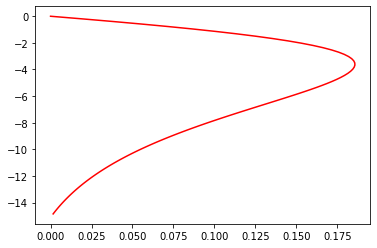

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def trajectory_magnus_friction(m,alpha1,alpha2,gamma,la,g,ux0,uy0,uz0,x0,y0,z0,omx0,omy0,omz0,ti,tf,n):
  x=x0
  y=y0
  z=z0
  ux=ux0
  uy=uy0
  uz=uz0
  omx=omx0
  omy=omy0
  omz=omz0
  u=np.sqrt(ux**2+uy**2+uz**2)
  Lx=[]
  Ly=[]
  Lz=[]
  h=(tf-ti)/n
  beta1 = alpha1/m
  beta2 = alpha2/m
  R = alpha2*u/alpha1
  LR=[]
  for k in range(0,n+1):
    Lx.append(x)
    Ly.append(y)
    Lz.append(z)
    LR.append(R)
    ux = ux + h*(-beta1*ux - beta2*u*ux + gamma*(omy*uz -omz*uy))
    uy = uy + h*(-beta1*uy - beta2*u*uy + gamma*(omz*ux -omx*uz))
    uz = uz + h*(-beta1*uz - beta2*u*uz + gamma*(omx*uy -omy*ux) - g)
    u=np.sqrt(ux**2+uy**2+uz**2)
    omx = omx - h *la*omx
    omy = omy - h *la*omy
    omz = omz - h *la*omz   
    x = x + h*ux
    y = y + h*uy
    z = z + h*uz
    R = alpha2*u/alpha1
    k=k+1
  p=1
  while Lz[p]>0:
    p=p+1
  Max = Lx[p]
  return plt.plot(Lx,Lz,'r-'), #plt.plot(Lx,LR,'r-'), #print("The range is: ", Lx[p])

trajectory_magnus_friction(1,0.8,0.1,0.5,1.5,10,1,0,-10,0,0,0,0,0,10,0,2,100)

:## Code 2: Three-dimensional representation (In progress)

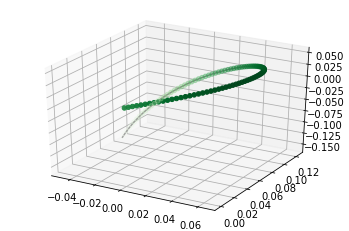

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')


x0, y0, z0, ux0, uy0, uz0, omx0, omy0, omz0, ti, tf, n, m, g, alpha1, alpha2, gamma, la = 0,0,0,1,0,1,0,0,15,0,0.3,100,1, 10,0.8,0,1,0


x=x0
y=y0
z=x0
ux=ux0
uy=uy0
uz=uz0
omx=omx0
omy=omy0
omz=omz0
u=np.sqrt(ux**2+uy**2+uz**2)
Lx=[]
Ly=[]
Lz=[]
h=(tf-ti)/n
beta1 = alpha1/m
beta2 = alpha2/m
for k in range(0,n+1):
  Lx.append(x)
  Ly.append(y)
  Lz.append(z)
  ux = ux + h*(-beta1*ux - beta2*u*ux + gamma*(omy*uz -omz*uy))
  uy = uy + h*(-beta1*uy - beta2*u*uy + gamma*(omz*ux -omx*uz))
  uz = uz + h*(-beta1*uz - beta2*u*uz + gamma*(omx*uy -omy*ux) - g)
  u=np.sqrt(ux**2+uy**2+uz**2)
  omx = omx - h *la*omx
  omy = omy - h *la*omy
  omz = omz - h *la*omz   
  x = x + h*ux
  y = y + h*uy
  z = z + h*uz

zline = Lz
xline = Lx
yline = Ly
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = Lz
xdata = Lx
ydata = Ly
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Code 3: Movie (In progress)

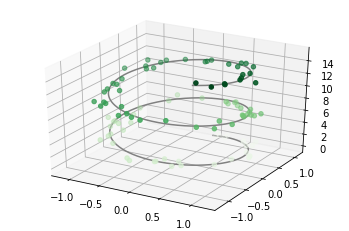

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

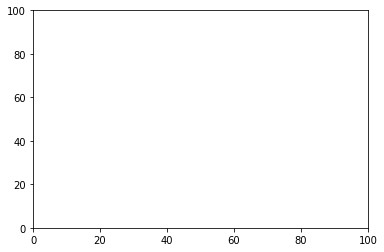

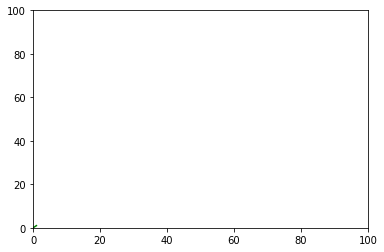

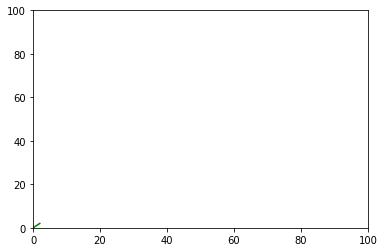

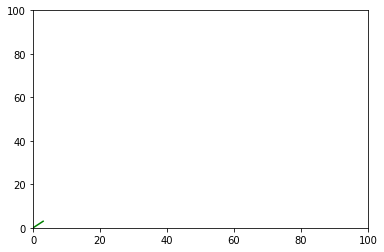

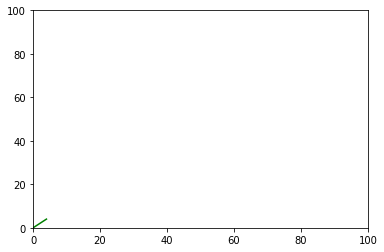

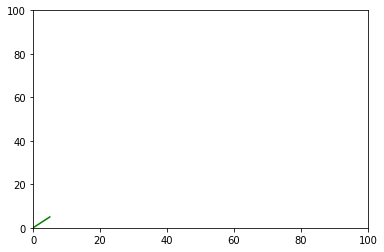

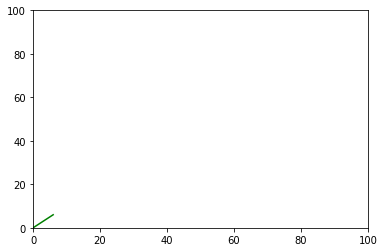

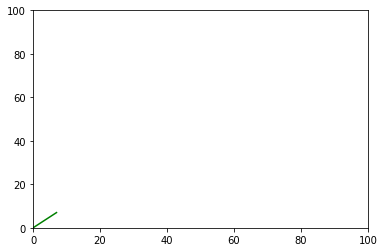

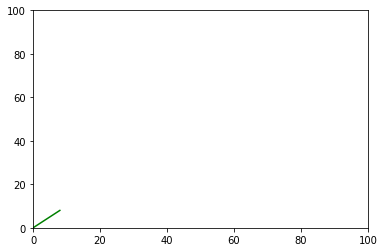

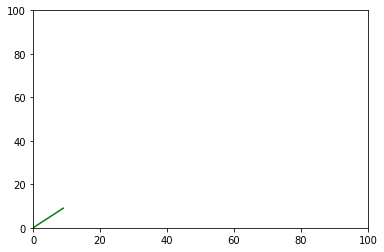

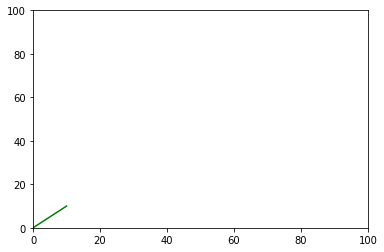

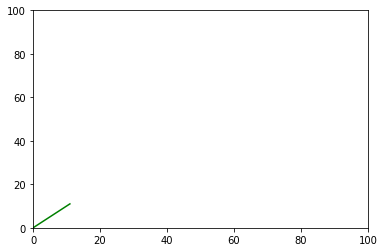

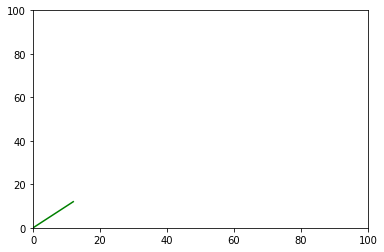

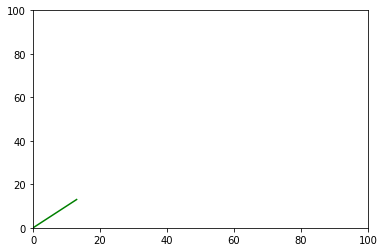

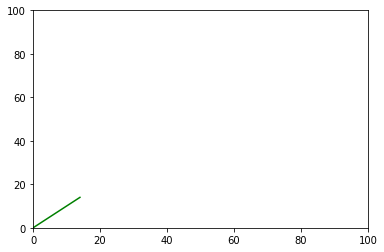

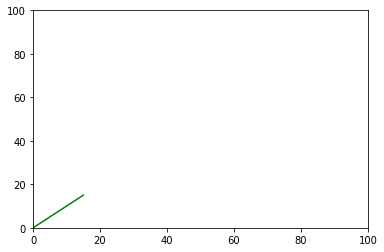

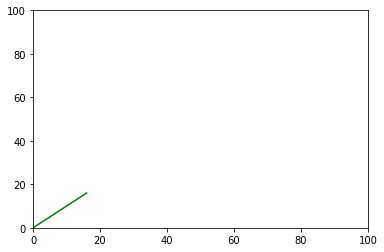

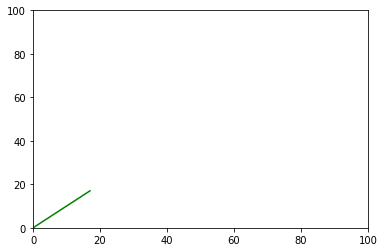

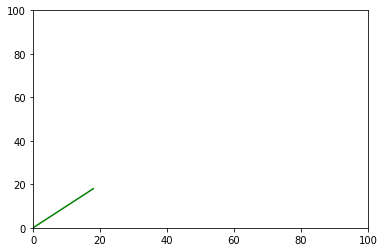

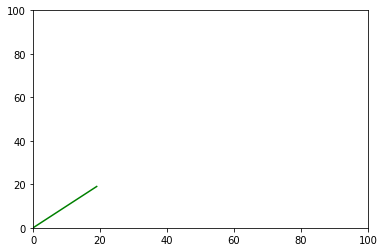

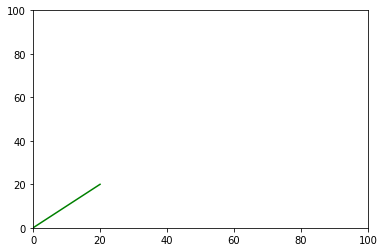

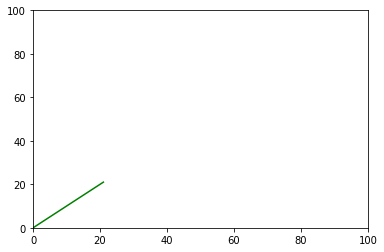

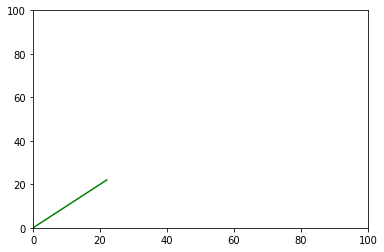

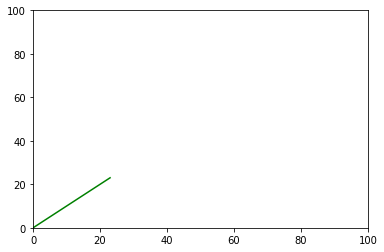

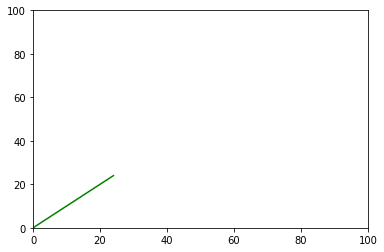

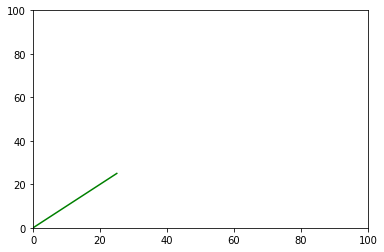

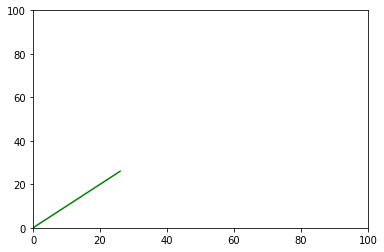

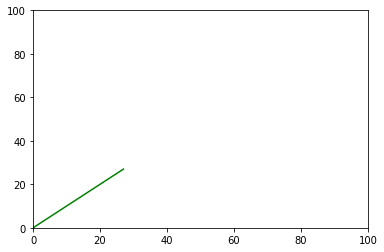

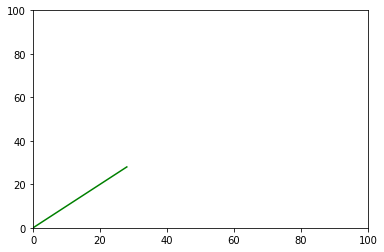

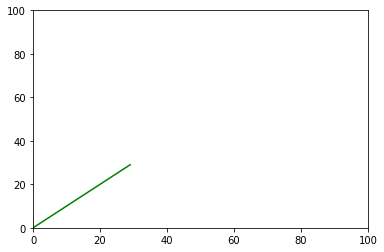

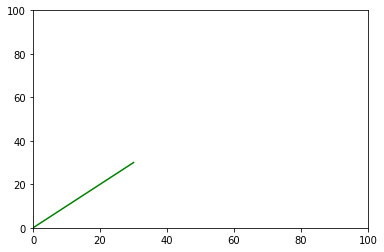

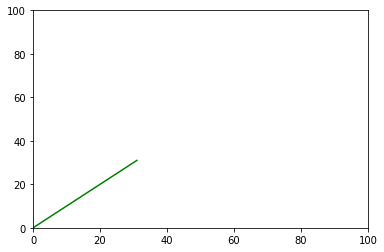

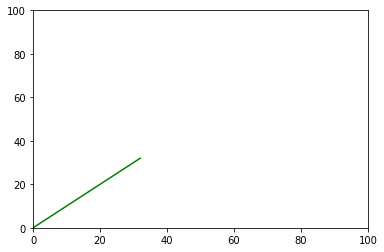

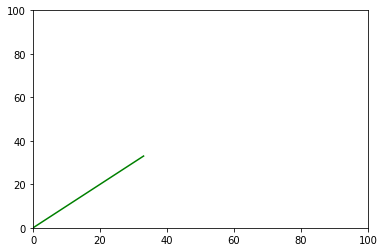

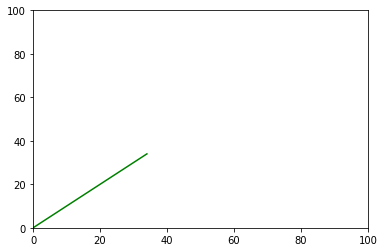

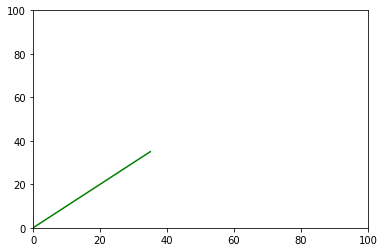

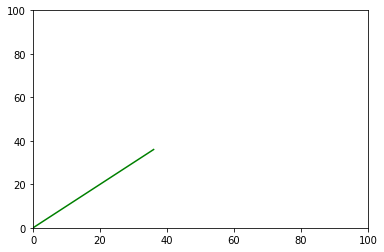

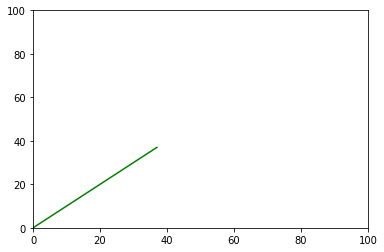

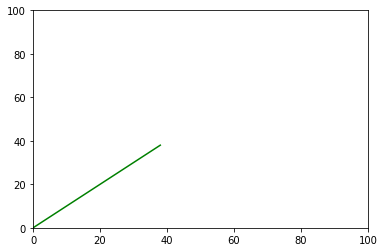

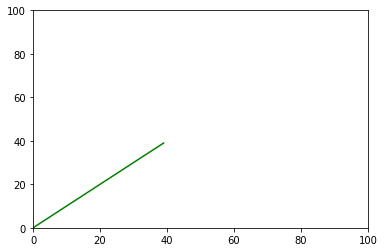

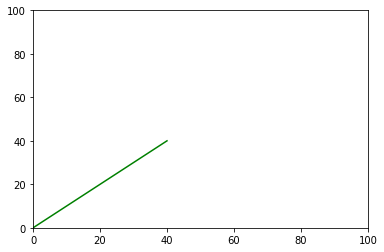

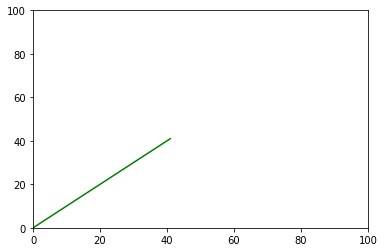

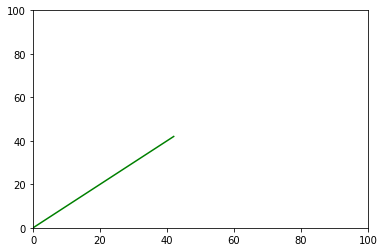

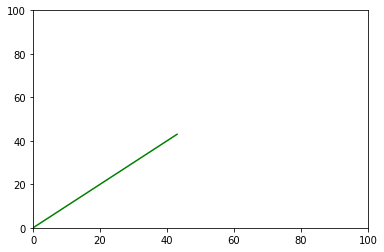

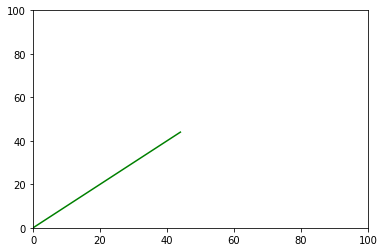

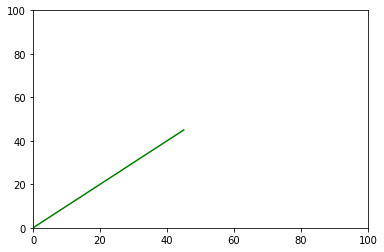

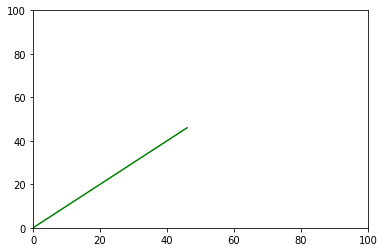

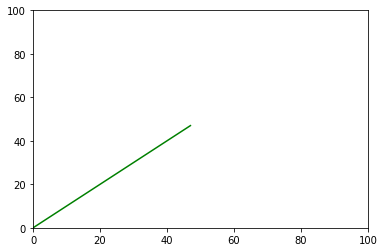

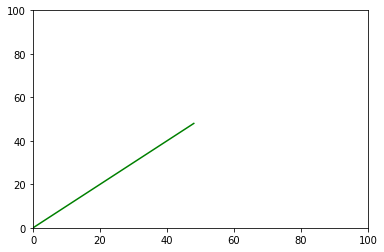

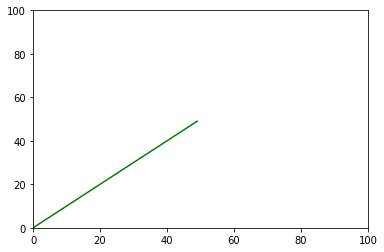

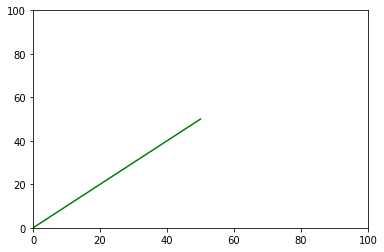

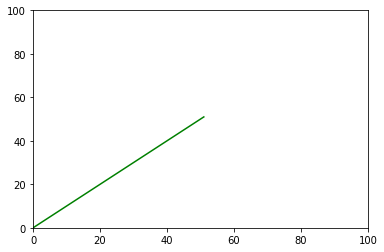

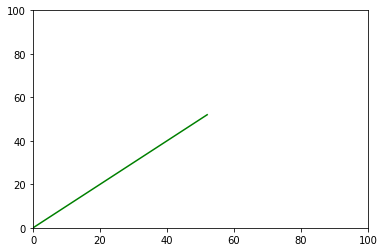

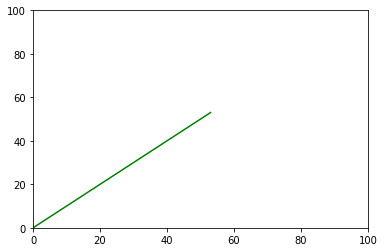

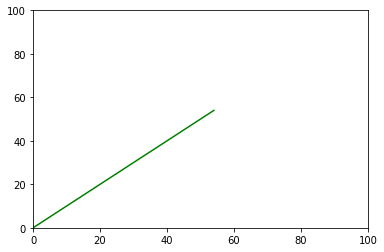

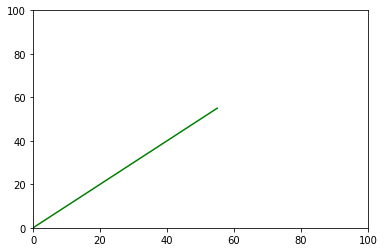

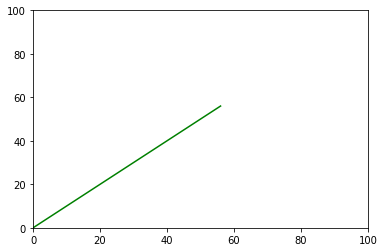

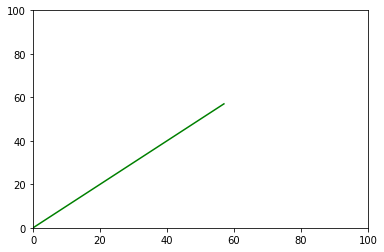

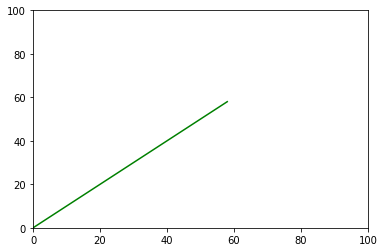

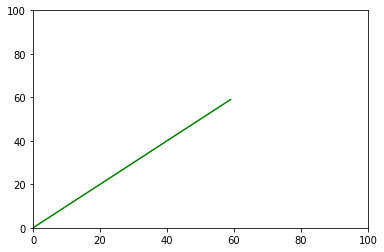

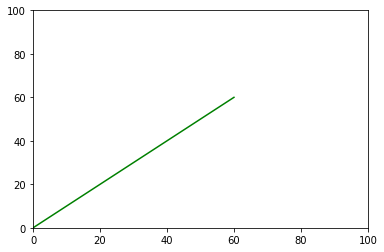

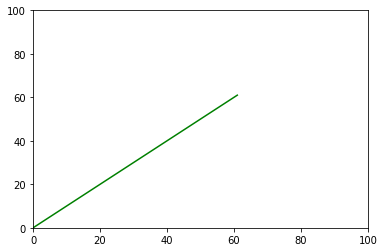

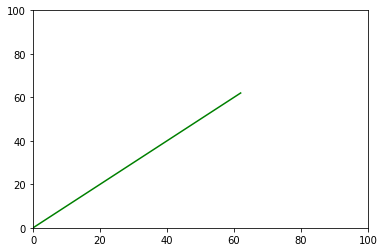

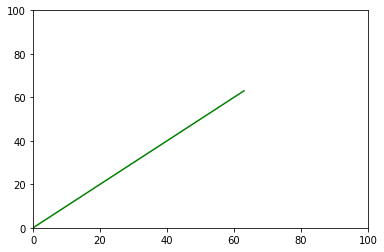

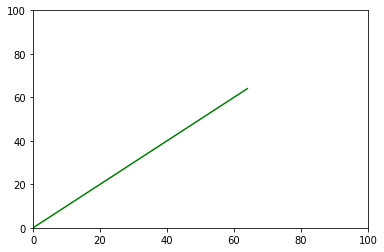

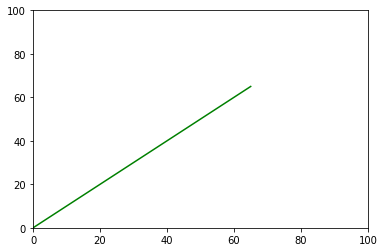

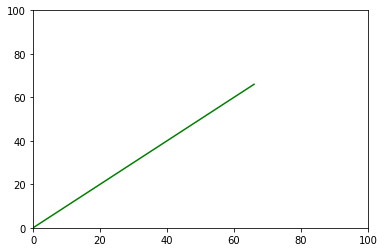

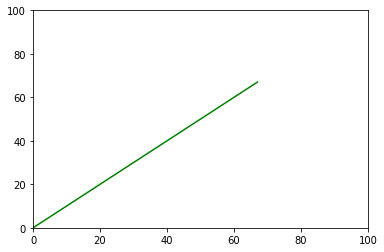

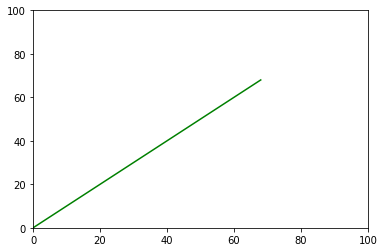

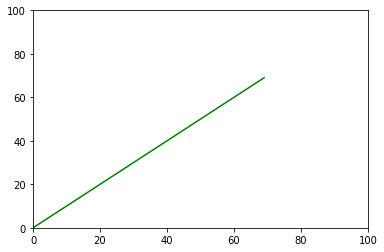

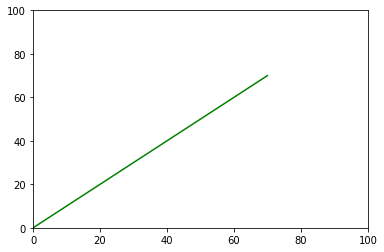

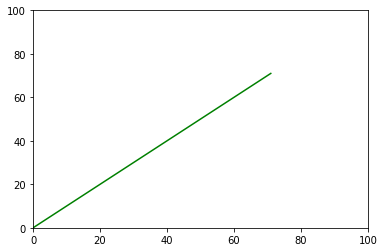

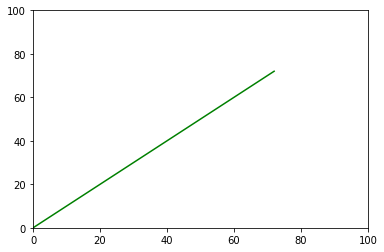

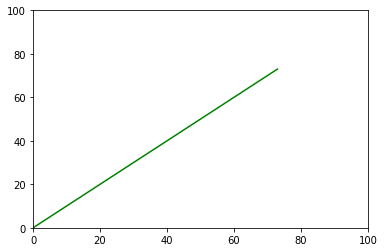

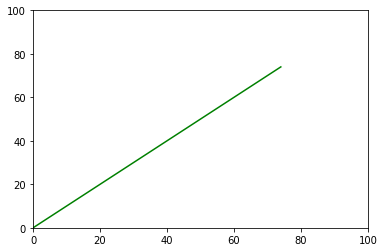

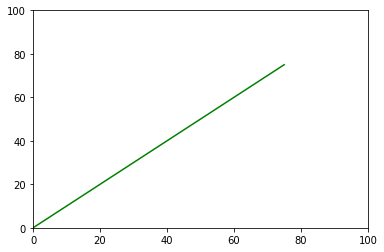

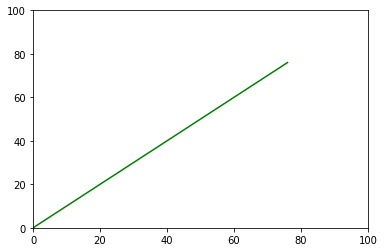

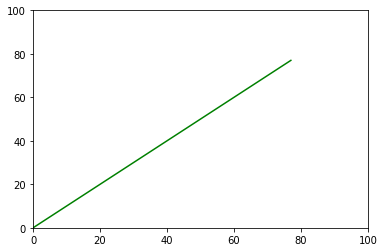

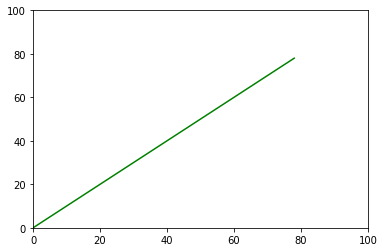

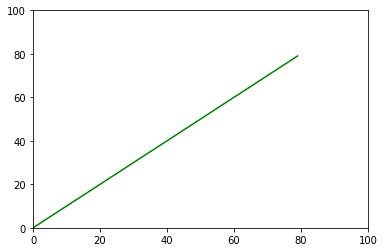

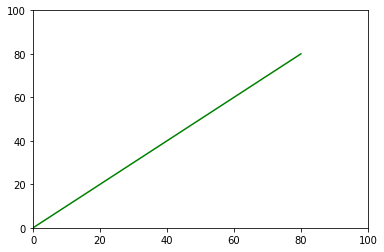

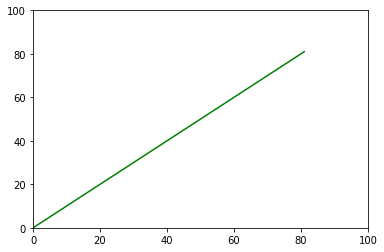

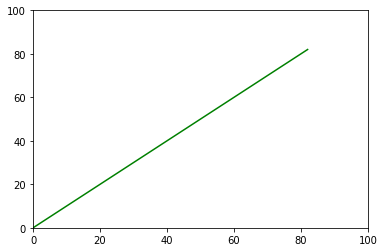

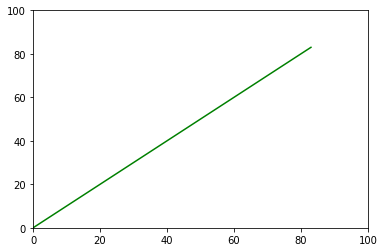

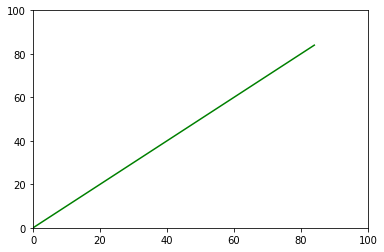

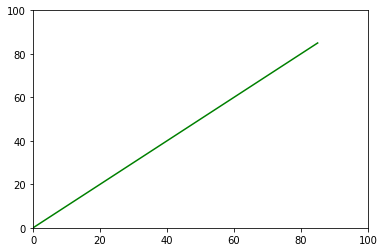

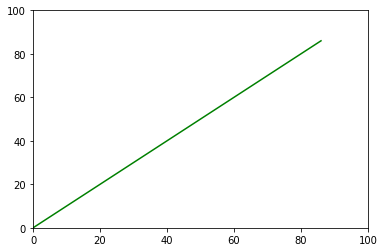

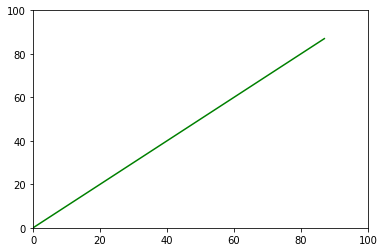

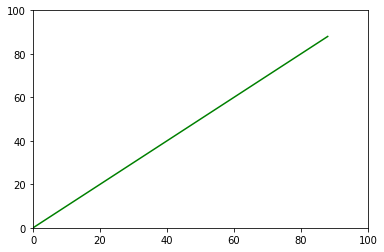

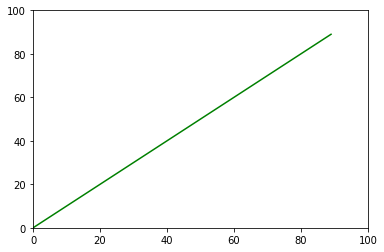

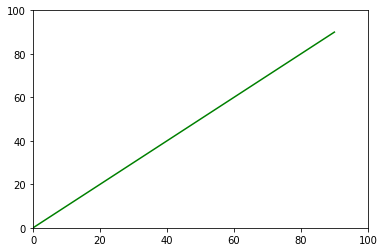

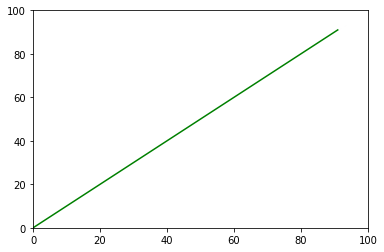

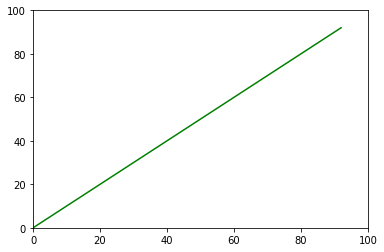

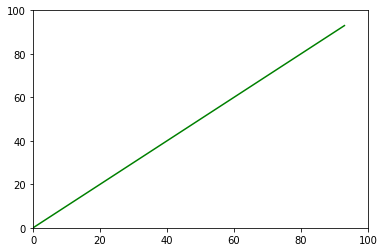

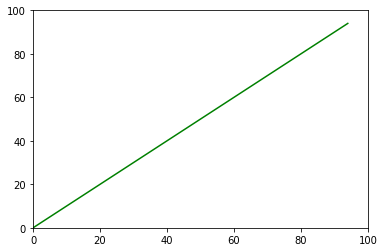

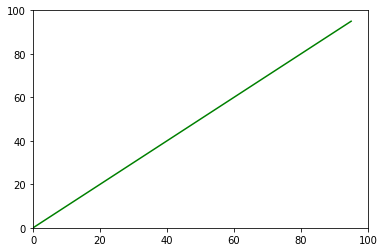

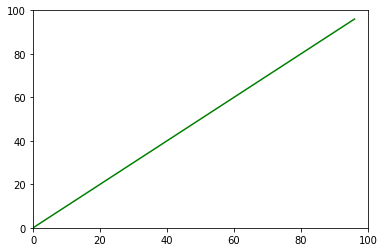

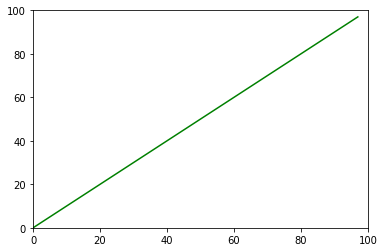

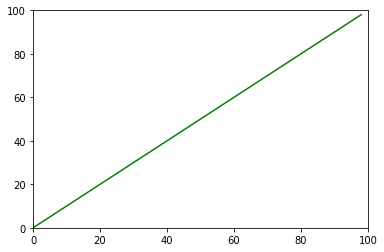

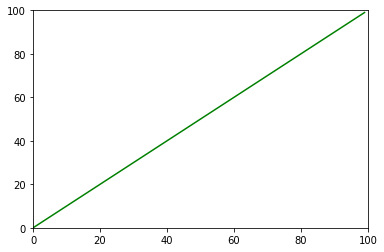

In [1]:

from matplotlib import pyplot as plt
  
x = []
y = []
  
for i in range(100):
    x.append(i)
    y.append(i)
  
    # Mention x and y limits to define their range
    plt.xlim(0, 100)
    plt.ylim(0, 100)
      
    # Ploting graph
    plt.plot(x, y, color = 'green')
    plt.pause(0.01)
  

# Random drift force (In progress)

## Motion of a ball falling in viscous liquid and experiencing a drift force

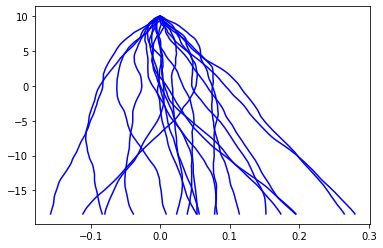

In [6]:
import matplotlib.pyplot as plt
import random

def motion(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax):
    vx=vxo
    vy=vyo
    vz=vzo
    x=xo
    y=yo
    z=zo
    Lvx=[]
    Lvy=[]
    Lvz=[]
    Lx=[]
    Ly=[]
    Lz=[]
    for k in range(0,Nmax+1):
        Lvx.append(vx)
        Lvy.append(vy)
        Lvz.append(vz)
        Lx.append(x)
        Ly.append(y)
        Lz.append(z)
        x=x+h*vx
        y=y+h*vy
        z=z+h*vz
        vx=vx+h*(-ax*vx+f*random.randint(-1,1))
        vy=vy+h*(-ay*vy+f*random.randint(-1,1))
        vz=vz+h*(-az*vz+b)
        k=k+1
    return plt.plot(Lx,Lz,'b-')

for k in range(1,21):
    motion(0,0,0,0,0,10,0.2,0.2,0.2,-1,0.5,0.001,10000)

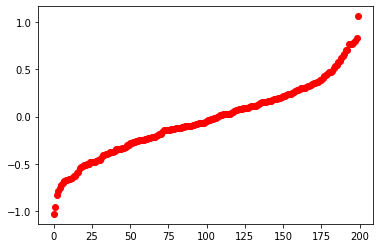

In [8]:
def xmax(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax):
    vx=vxo
    vy=vyo
    vz=vzo
    x=xo
    y=yo
    z=zo
    Lvx=[]
    Lvy=[]
    Lvz=[]
    Lx=[]
    Ly=[]
    Lz=[]
    for k in range(0,Nmax+1):
        Lvx.append(vx)
        Lvy.append(vy)
        Lvz.append(vz)
        Lx.append(x)
        Ly.append(y)
        Lz.append(z)
        x=x+h*vx
        y=y+h*vy
        z=z+h*vz
        vx=vx+h*(-ax*vx+f*random.randint(-1,1))
        vy=vy+h*(-ay*vy+f*random.randint(-1,1))
        vz=vz+h*(-az*vz+b)
        k=k+1
    return Lx[-1]

def end(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax,No):
    Lend=[]
    for k in range(1,No+1):
        last=xmax(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax)
        Lend.append(last)
    Lend.sort()
    return plt.plot(Lend,'ro')

end(0,0,0,0,0,10,0.2,0.2,0.2,-1,0.5,0.01,1000,200)

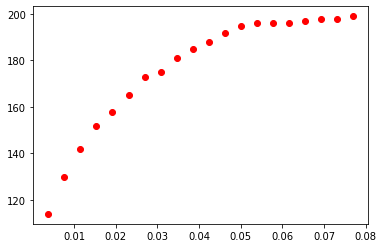

In [9]:
import matplotlib.pyplot as plt
import random

def xmax(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax):
    vx=vxo
    vy=vyo
    vz=vzo
    x=xo
    y=yo
    z=zo
    Lvx=[]
    Lvy=[]
    Lvz=[]
    Lx=[]
    Ly=[]
    Lz=[]
    for k in range(0,Nmax+1):
        Lvx.append(vx)
        Lvy.append(vy)
        Lvz.append(vz)
        Lx.append(x)
        Ly.append(y)
        Lz.append(z)
        x=x+h*vx
        y=y+h*vy
        z=z+h*vz
        vx=vx+h*(-ax*vx+f*random.randint(-1,1))
        vy=vy+h*(-ay*vy+f*random.randint(-1,1))
        vz=vz+h*(-az*vz+b)
        k=k+1
    return Lx[-1]

def end(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax,No):
    Lend=[]
    for k in range(1,No+1):
        last=xmax(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax)
        Lend.append(last)
    Lend.sort()
    return Lend

def count(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax,No,M):
    L=end(vxo,vyo,vzo,xo,yo,zo,ax,ay,az,b,f,h,Nmax,No)
    Lmax = max(L)
    delta = Lmax/M
    Lvalue=[0]
    u=0
    for k in range(1,M+1):
        u=u+delta
        Lvalue.append(u)
    Lcount=[]
    for k in range(0,M):
        ninf=0
        for i in range(1,No):
            if L[i]<Lvalue[k+1]:
                ninf=ninf+1
        Lcount.append(ninf)
    Lvalue.remove(0)
    return plt.plot(Lvalue,Lcount,'ro')

count(0,0,0,0,0,10,0.2,0.2,0.2,-1,0.1,0.001,10000,200,20)

# Planet orbit (In progress)

## Inverse squared central force

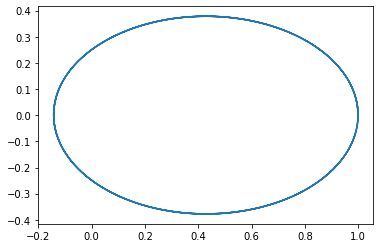

In [2]:
import matplotlib.pyplot as plt
import math as m

def Orbit22(t,theta,v,r,L,h,n,G,M):
    t_liste=[]
    v_liste=[]
    r_liste=[]
    x_liste=[]
    y_liste=[]
    theta_liste=[]
    for k in range(1,n+1):
        t_liste.append(t)
        r_liste.append(r)
        v_liste.append(v)
        theta=theta+h*(L/r**2)
        x=r*m.cos(theta)
        y=r*m.sin(theta)
        x_liste.append(x)
        y_liste.append(y)
        theta_liste.append(theta)
        r=r+h*v
        v=v+h*(-G*M/(r**2)+(L**2/r**3))
        t=t+h
        k=k+1
    return plt.plot(x_liste, y_liste)


Orbit22(0,0,0,1,0.5,0.001,8000,1,1)

## Central force in general: non-closed orbits

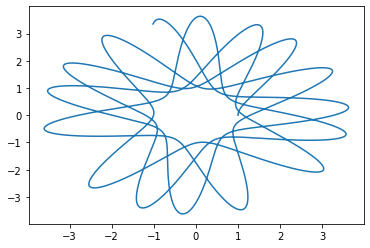

In [4]:
import matplotlib.pyplot as plt
import math as m

def OrbitRadial2(t,theta,v,r,L,h,n,G,M):
    t_liste=[]
    v_liste=[]
    r_liste=[]
    x_liste=[]
    y_liste=[]
    theta_liste=[]
    for k in range(1,n+1):
        t_liste.append(t)
        r_liste.append(r)
        v_liste.append(v)
        theta=theta+h*(L/r**2)
        x=r*m.cos(theta)
        y=r*m.sin(theta)
        x_liste.append(x)
        y_liste.append(y)
        theta_liste.append(theta)
        r=r+h*v
        v=v+h*(-G*M/(1)+3/r**2+(L**2/r**3))
        t=t+h
        k=k+1
    return plt.plot(x_liste, y_liste)


OrbitRadial2(0,0,0,1,1,0.0001,1000000,1,1)